In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np # version 1.16

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
corpus_raw1 = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = ' Me gusta jugar fútbol con mis amigos'
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

In [5]:
print(words)
print(vocab_size)

set(['me', 'gusta', 'f\xc3\xbatbol', 'jugar', 'mis', 'amigos', 'con'])
7


In [6]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    print(sentence)
    #print(word2int['sentences.split()'])

 me gusta jugar fútbol con mis amigos


In [7]:
print(word2int)
print(int2word)

{'me': 0, 'gusta': 1, 'f\xc3\xbatbol': 2, 'jugar': 3, 'mis': 4, 'amigos': 5, 'con': 6}
{0: 'me', 1: 'gusta', 2: 'f\xc3\xbatbol', 3: 'jugar', 4: 'mis', 5: 'amigos', 6: 'con'}


In [8]:
print(word2int['fútbol'])
print(word2int['con'])

2
6


In [9]:
WINDOW_SIZE = 3

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [10]:
print(sentences)
print(len(data))
print(data)

[['me', 'gusta', 'jugar', 'f\xc3\xbatbol', 'con', 'mis', 'amigos']]
30
[['me', 'gusta'], ['me', 'jugar'], ['me', 'f\xc3\xbatbol'], ['gusta', 'me'], ['gusta', 'jugar'], ['gusta', 'f\xc3\xbatbol'], ['gusta', 'con'], ['jugar', 'me'], ['jugar', 'gusta'], ['jugar', 'f\xc3\xbatbol'], ['jugar', 'con'], ['jugar', 'mis'], ['f\xc3\xbatbol', 'me'], ['f\xc3\xbatbol', 'gusta'], ['f\xc3\xbatbol', 'jugar'], ['f\xc3\xbatbol', 'con'], ['f\xc3\xbatbol', 'mis'], ['f\xc3\xbatbol', 'amigos'], ['con', 'gusta'], ['con', 'jugar'], ['con', 'f\xc3\xbatbol'], ['con', 'mis'], ['con', 'amigos'], ['mis', 'jugar'], ['mis', 'f\xc3\xbatbol'], ['mis', 'con'], ['mis', 'amigos'], ['amigos', 'f\xc3\xbatbol'], ['amigos', 'con'], ['amigos', 'mis']]


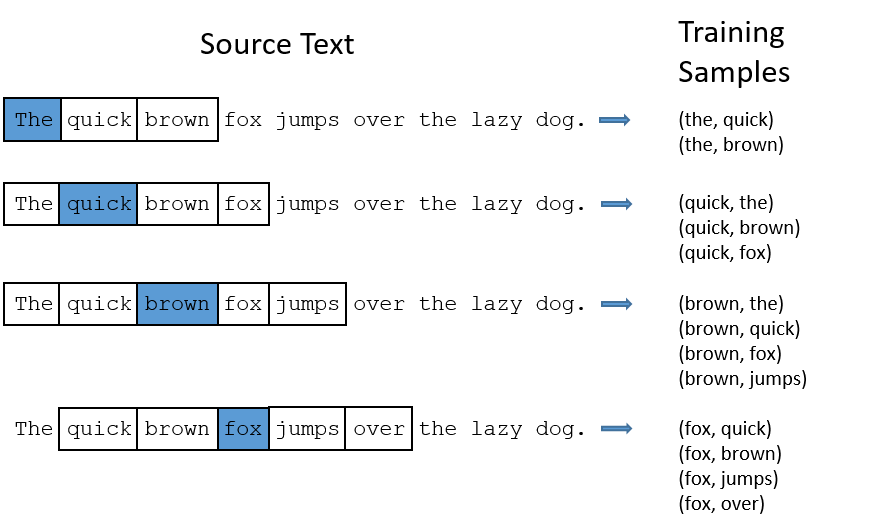

In [11]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [12]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],y_train)
# convert them to numpy arrays
print("X TRAIN ########################################")
print(x_train) 
print("Y TRAIN ########################################")
print(y_train)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print("X TRAIN ########################################")
print(x_train) 
print("Y TRAIN ########################################")
print(y_train)
print(x_train.shape, y_train.shape)

X TRAIN ########################################
[array([1., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 1.

In [13]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 10 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

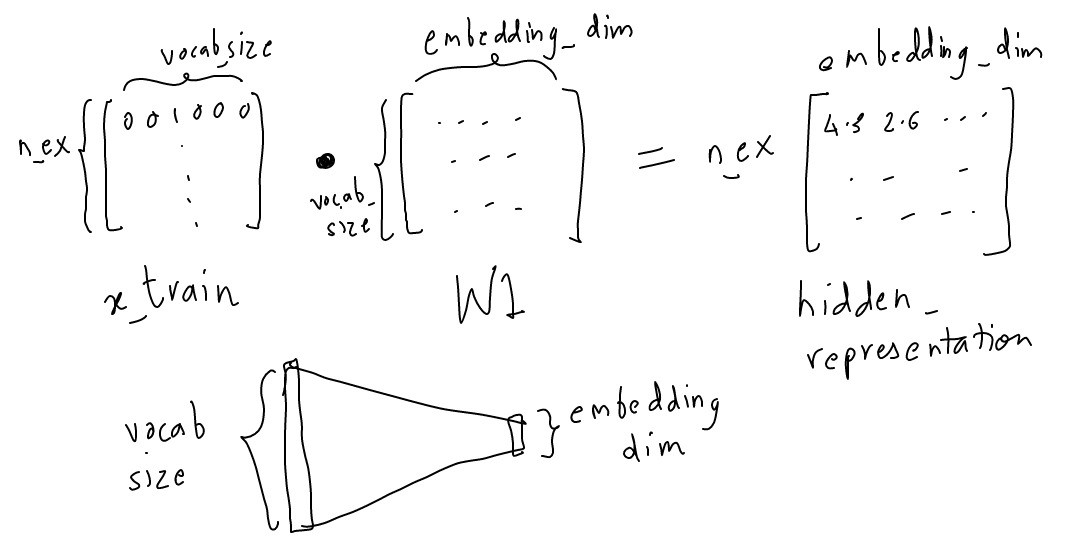

In [14]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

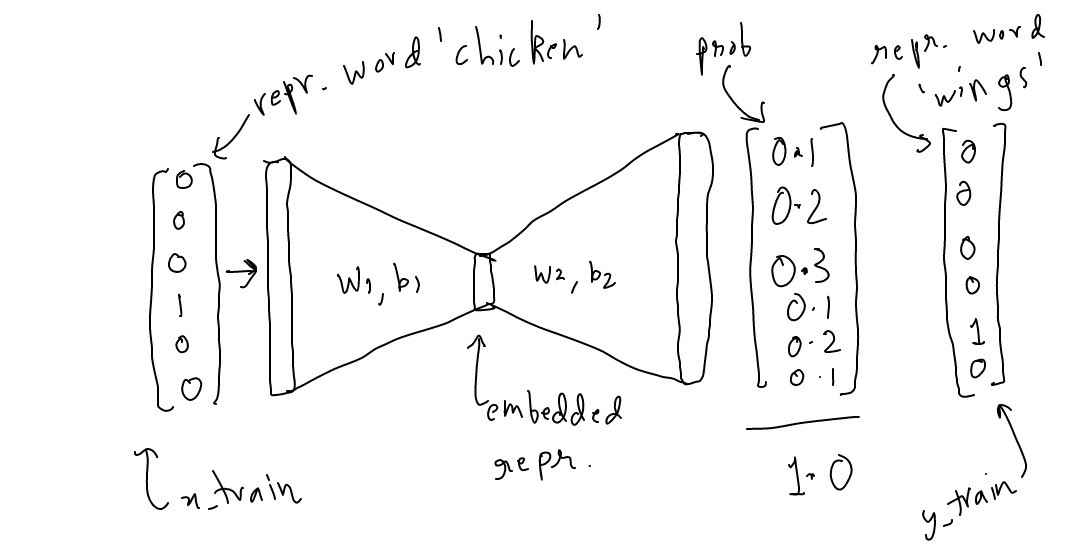

In [15]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 100
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 5.9166646)
('loss is : ', 5.4521894)
('loss is : ', 5.1167855)
('loss is : ', 4.8455787)
('loss is : ', 4.608348)
('loss is : ', 4.3923497)
('loss is : ', 4.19232)
('loss is : ', 4.0060863)
('loss is : ', 3.8328023)
('loss is : ', 3.6721613)
('loss is : ', 3.5240047)
('loss is : ', 3.3881807)
('loss is : ', 3.2646027)
('loss is : ', 3.1533182)
('loss is : ', 3.0543892)
('loss is : ', 2.9675148)
('loss is : ', 2.8916688)
('loss is : ', 2.8251243)
('loss is : ', 2.7658975)
('loss is : ', 2.7122276)
('loss is : ', 2.6627967)
('loss is : ', 2.6167133)
('loss is : ', 2.5733984)
('loss is : ', 2.5324779)
('loss is : ', 2.4936996)
('loss is : ', 2.4568856)
('loss is : ', 2.4218988)
('loss is : ', 2.388629)
('loss is : ', 2.3569798)
('loss is : ', 2.3268654)
('loss is : ', 2.2982035)
('loss is : ', 2.2709193)
('loss is : ', 2.2449389)
('loss is : ', 2.220192)
('loss is : ', 2.1966107)
('loss is : ', 2.1741297)
('loss is : ', 2.1526856)
('loss is : ', 2.1322174)
('loss is : ', 2.

In [16]:
print(sess.run(W1))
print('-------------------------------------------------------------')
print(sess.run(b1))
print('-------------------------------------------------------------')

[[-1.2484621  -0.5714216   1.0023446  -1.2647971   0.59370464 -1.6540807
   0.56392866 -0.59069043  0.13220872  0.92797273]
 [ 1.0325489   0.4464551  -1.1740441  -0.43173978 -0.34123844  0.2830519
   0.08742611  0.5412269  -0.02997486  0.37672904]
 [ 0.8255867  -0.06514118 -0.13249664 -0.29672584 -0.71715033 -0.2963074
  -0.15001933 -0.09037831  0.16786422 -0.17094876]
 [-1.6303588   1.0026735   0.26728198  1.218805    2.0232701   0.03973805
   0.15439938 -1.2353786  -0.26963627 -0.23709399]
 [ 1.8428175   1.0075235  -1.6551733   0.39820692  0.694195   -0.05676249
   0.2902717   0.7702759   0.01309488  0.43645093]
 [-0.44854867 -1.0996221  -1.5676279  -2.4229925  -1.0759804   0.32663292
   2.2763917  -0.89535767  1.2193735  -0.27701974]
 [ 0.05389119  1.5471712   0.59602994  0.9029385  -1.0949678   1.8118377
  -0.98535347  1.2098047   2.340684   -1.040079  ]]
-------------------------------------------------------------
[ 0.6551275   0.0603891  -0.5263357  -0.10127573 -0.6948222  -1.04

In [17]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors.shape)
print(vectors)

(7, 10)
[[-5.9333456e-01 -5.1103252e-01  4.7600889e-01 -1.3660728e+00
  -1.0111755e-01 -2.6964946e+00  2.3736781e-01 -2.3745351e+00
  -8.7530315e-01  1.3841852e+00]
 [ 1.6876764e+00  5.0684416e-01 -1.7003798e+00 -5.3301549e-01
  -1.0360606e+00 -7.5936204e-01 -2.3913474e-01 -1.2426176e+00
  -1.0374867e+00  8.3294153e-01]
 [ 1.4807142e+00 -4.7520809e-03 -6.5883237e-01 -3.9800158e-01
  -1.4119725e+00 -1.3387214e+00 -4.7658020e-01 -1.8742229e+00
  -8.3964765e-01  2.8526372e-01]
 [-9.7523129e-01  1.0630625e+00 -2.5905374e-01  1.1175293e+00
   1.3284479e+00 -1.0026759e+00 -1.7216147e-01 -3.0192232e+00
  -1.2771481e+00  2.1911848e-01]
 [ 2.4979451e+00  1.0679126e+00 -2.1815090e+00  2.9693118e-01
  -6.2721968e-04 -1.0991764e+00 -3.6289155e-02 -1.0135686e+00
  -9.9441695e-01  8.9266336e-01]
 [ 2.0657885e-01 -1.0392331e+00 -2.0939636e+00 -2.5242682e+00
  -1.7708026e+00 -7.1578103e-01  1.9498309e+00 -2.6792023e+00
   2.1186161e-01  1.7919272e-01]
 [ 7.0901871e-01  1.6075603e+00  6.9694221e-02  8.

In [18]:
print(vectors[ word2int['jugar'] ])

[-0.9752313   1.0630625  -0.25905374  1.1175293   1.3284479  -1.0026759
 -0.17216147 -3.0192232  -1.2771481   0.21911848]


In [21]:
print(int2word[0])

me
